In [1]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt
from importlib.resources import files
from manifold_gp.kernels.riemann_matern_kernel import RiemannMaternKernel
from manifold_gp.models.riemann_gp import RiemannGP

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
# Train dataset
train_x = torch.from_numpy(np.loadtxt(
    files('manifold_gp.data').joinpath('mnist_x_train.csv'))).float().to(device)
train_y = torch.from_numpy(np.loadtxt(
    files('manifold_gp.data').joinpath('mnist_y_train.csv'))).float().to(device)
train_label = torch.from_numpy(np.loadtxt(
    files('manifold_gp.data').joinpath('mnist_label_train.csv'))).float().to(device)

In [4]:
# Test dataset
test_x = torch.from_numpy(np.loadtxt(
    files('manifold_gp.data').joinpath('mnist_x_test.csv'))).float().to(device)
test_y = torch.from_numpy(np.loadtxt(
    files('manifold_gp.data').joinpath('mnist_y_test.csv'))).float().to(device)
test_label = torch.from_numpy(np.loadtxt(
    files('manifold_gp.data').joinpath('mnist_label_test.csv'))).float().to(device)

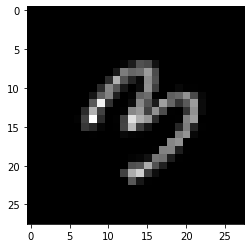

In [5]:
with torch.no_grad():
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.imshow(train_x[0,:].cpu().numpy().reshape(28,28,order='F'),cmap='gray')

In [6]:
# Initialize kernel
nu = 1
neighbors = 50
modes = 10
kernel = gpytorch.kernels.ScaleKernel(RiemannMaternKernel(nu=nu, nodes=train_x, neighbors=neighbors, modes=modes))

In [7]:
# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=gpytorch.constraints.GreaterThan(1e-8))
model = RiemannGP(train_x, train_y, likelihood, kernel).to(device)

In [8]:
%%capture
# Model Hyperparameters
hypers = {
    'likelihood.noise_covar.noise': 1e-5,
    'covar_module.base_kernel.epsilon': 0.5,
    'covar_module.base_kernel.lengthscale': 0.3,
    'covar_module.outputscale': 1,
}
model.initialize(**hypers)

In [9]:
# Train model
lr = 1e-3
iters = 500
verbose = True
loss = model.manifold_informed_train(lr, iters, verbose)

Iteration: 0, Loss: 4193.300, Noise Variance: 0.003, Signal Variance: 1.000, Lengthscale: 0.300, Epsilon: 0.500
Iteration: 1, Loss: 4171.858, Noise Variance: 0.003, Signal Variance: 1.000, Lengthscale: 0.300, Epsilon: 0.500
Iteration: 2, Loss: 4148.800, Noise Variance: 0.003, Signal Variance: 1.001, Lengthscale: 0.301, Epsilon: 0.501
Iteration: 3, Loss: 4126.819, Noise Variance: 0.003, Signal Variance: 1.001, Lengthscale: 0.301, Epsilon: 0.501
Iteration: 4, Loss: 4104.413, Noise Variance: 0.003, Signal Variance: 1.001, Lengthscale: 0.301, Epsilon: 0.502
Iteration: 5, Loss: 4082.055, Noise Variance: 0.003, Signal Variance: 1.002, Lengthscale: 0.301, Epsilon: 0.502
Iteration: 6, Loss: 4059.995, Noise Variance: 0.003, Signal Variance: 1.002, Lengthscale: 0.302, Epsilon: 0.502
Iteration: 7, Loss: 4037.764, Noise Variance: 0.003, Signal Variance: 1.002, Lengthscale: 0.302, Epsilon: 0.503
Iteration: 8, Loss: 4015.602, Noise Variance: 0.003, Signal Variance: 1.003, Lengthscale: 0.302, Epsilon

Iteration: 75, Loss: 2725.316, Noise Variance: 0.003, Signal Variance: 1.023, Lengthscale: 0.319, Epsilon: 0.530
Iteration: 76, Loss: 2708.732, Noise Variance: 0.003, Signal Variance: 1.023, Lengthscale: 0.320, Epsilon: 0.531
Iteration: 77, Loss: 2691.664, Noise Variance: 0.003, Signal Variance: 1.024, Lengthscale: 0.320, Epsilon: 0.531
Iteration: 78, Loss: 2675.336, Noise Variance: 0.003, Signal Variance: 1.024, Lengthscale: 0.320, Epsilon: 0.531
Iteration: 79, Loss: 2658.201, Noise Variance: 0.003, Signal Variance: 1.024, Lengthscale: 0.320, Epsilon: 0.532
Iteration: 80, Loss: 2642.026, Noise Variance: 0.003, Signal Variance: 1.025, Lengthscale: 0.321, Epsilon: 0.532
Iteration: 81, Loss: 2626.838, Noise Variance: 0.003, Signal Variance: 1.025, Lengthscale: 0.321, Epsilon: 0.533
Iteration: 82, Loss: 2609.602, Noise Variance: 0.003, Signal Variance: 1.025, Lengthscale: 0.321, Epsilon: 0.533
Iteration: 83, Loss: 2593.656, Noise Variance: 0.003, Signal Variance: 1.025, Lengthscale: 0.321

Iteration: 148, Loss: 1670.229, Noise Variance: 0.003, Signal Variance: 1.044, Lengthscale: 0.338, Epsilon: 0.561
Iteration: 149, Loss: 1658.281, Noise Variance: 0.003, Signal Variance: 1.044, Lengthscale: 0.338, Epsilon: 0.561
Iteration: 150, Loss: 1645.077, Noise Variance: 0.003, Signal Variance: 1.044, Lengthscale: 0.338, Epsilon: 0.562
Iteration: 151, Loss: 1633.094, Noise Variance: 0.003, Signal Variance: 1.045, Lengthscale: 0.338, Epsilon: 0.562
Iteration: 152, Loss: 1620.717, Noise Variance: 0.003, Signal Variance: 1.045, Lengthscale: 0.339, Epsilon: 0.562
Iteration: 153, Loss: 1608.778, Noise Variance: 0.003, Signal Variance: 1.045, Lengthscale: 0.339, Epsilon: 0.563
Iteration: 154, Loss: 1597.240, Noise Variance: 0.003, Signal Variance: 1.045, Lengthscale: 0.339, Epsilon: 0.563
Iteration: 155, Loss: 1583.881, Noise Variance: 0.003, Signal Variance: 1.046, Lengthscale: 0.339, Epsilon: 0.564
Iteration: 156, Loss: 1572.578, Noise Variance: 0.003, Signal Variance: 1.046, Lengthsca

Iteration: 220, Loss: 886.952, Noise Variance: 0.003, Signal Variance: 1.063, Lengthscale: 0.355, Epsilon: 0.592
Iteration: 221, Loss: 878.637, Noise Variance: 0.003, Signal Variance: 1.063, Lengthscale: 0.355, Epsilon: 0.592
Iteration: 222, Loss: 870.144, Noise Variance: 0.003, Signal Variance: 1.063, Lengthscale: 0.356, Epsilon: 0.593
Iteration: 223, Loss: 859.762, Noise Variance: 0.003, Signal Variance: 1.063, Lengthscale: 0.356, Epsilon: 0.593
Iteration: 224, Loss: 850.555, Noise Variance: 0.003, Signal Variance: 1.064, Lengthscale: 0.356, Epsilon: 0.594
Iteration: 225, Loss: 842.696, Noise Variance: 0.003, Signal Variance: 1.064, Lengthscale: 0.356, Epsilon: 0.594
Iteration: 226, Loss: 832.771, Noise Variance: 0.003, Signal Variance: 1.064, Lengthscale: 0.357, Epsilon: 0.595
Iteration: 227, Loss: 823.271, Noise Variance: 0.003, Signal Variance: 1.064, Lengthscale: 0.357, Epsilon: 0.595
Iteration: 228, Loss: 813.366, Noise Variance: 0.003, Signal Variance: 1.065, Lengthscale: 0.357

Iteration: 294, Loss: 276.317, Noise Variance: 0.004, Signal Variance: 1.080, Lengthscale: 0.373, Epsilon: 0.625
Iteration: 295, Loss: 269.340, Noise Variance: 0.004, Signal Variance: 1.081, Lengthscale: 0.373, Epsilon: 0.626
Iteration: 296, Loss: 262.578, Noise Variance: 0.004, Signal Variance: 1.081, Lengthscale: 0.373, Epsilon: 0.626
Iteration: 297, Loss: 255.742, Noise Variance: 0.004, Signal Variance: 1.081, Lengthscale: 0.373, Epsilon: 0.626
Iteration: 298, Loss: 248.589, Noise Variance: 0.004, Signal Variance: 1.081, Lengthscale: 0.374, Epsilon: 0.627
Iteration: 299, Loss: 241.071, Noise Variance: 0.004, Signal Variance: 1.082, Lengthscale: 0.374, Epsilon: 0.627
Iteration: 300, Loss: 233.614, Noise Variance: 0.004, Signal Variance: 1.082, Lengthscale: 0.374, Epsilon: 0.628
Iteration: 301, Loss: 227.786, Noise Variance: 0.004, Signal Variance: 1.082, Lengthscale: 0.374, Epsilon: 0.628
Iteration: 302, Loss: 221.768, Noise Variance: 0.004, Signal Variance: 1.082, Lengthscale: 0.374

Iteration: 370, Loss: -201.174, Noise Variance: 0.004, Signal Variance: 1.098, Lengthscale: 0.390, Epsilon: 0.660
Iteration: 371, Loss: -207.369, Noise Variance: 0.004, Signal Variance: 1.098, Lengthscale: 0.390, Epsilon: 0.660
Iteration: 372, Loss: -212.396, Noise Variance: 0.004, Signal Variance: 1.098, Lengthscale: 0.390, Epsilon: 0.661
Iteration: 373, Loss: -217.010, Noise Variance: 0.004, Signal Variance: 1.098, Lengthscale: 0.391, Epsilon: 0.661
Iteration: 374, Loss: -224.490, Noise Variance: 0.004, Signal Variance: 1.098, Lengthscale: 0.391, Epsilon: 0.662
Iteration: 375, Loss: -230.690, Noise Variance: 0.004, Signal Variance: 1.099, Lengthscale: 0.391, Epsilon: 0.662
Iteration: 376, Loss: -236.130, Noise Variance: 0.004, Signal Variance: 1.099, Lengthscale: 0.391, Epsilon: 0.663
Iteration: 377, Loss: -241.128, Noise Variance: 0.004, Signal Variance: 1.099, Lengthscale: 0.392, Epsilon: 0.663
Iteration: 378, Loss: -245.661, Noise Variance: 0.004, Signal Variance: 1.099, Lengthsca

Iteration: 446, Loss: -570.640, Noise Variance: 0.004, Signal Variance: 1.114, Lengthscale: 0.407, Epsilon: 0.696
Iteration: 447, Loss: -574.457, Noise Variance: 0.004, Signal Variance: 1.114, Lengthscale: 0.407, Epsilon: 0.696
Iteration: 448, Loss: -578.179, Noise Variance: 0.004, Signal Variance: 1.114, Lengthscale: 0.407, Epsilon: 0.697
Iteration: 449, Loss: -580.295, Noise Variance: 0.004, Signal Variance: 1.114, Lengthscale: 0.408, Epsilon: 0.697
Iteration: 450, Loss: -586.487, Noise Variance: 0.004, Signal Variance: 1.115, Lengthscale: 0.408, Epsilon: 0.698
Iteration: 451, Loss: -591.627, Noise Variance: 0.004, Signal Variance: 1.115, Lengthscale: 0.408, Epsilon: 0.698
Iteration: 452, Loss: -594.365, Noise Variance: 0.004, Signal Variance: 1.115, Lengthscale: 0.408, Epsilon: 0.698
Iteration: 453, Loss: -598.323, Noise Variance: 0.004, Signal Variance: 1.115, Lengthscale: 0.408, Epsilon: 0.699
Iteration: 454, Loss: -601.674, Noise Variance: 0.004, Signal Variance: 1.115, Lengthsca

In [10]:
%%capture
#Model Evaluation
likelihood.eval()
model.eval()

ArpackNoConvergence: ARPACK error -1: No convergence (50001 iterations, 0/10 eigenvectors converged) [ARPACK error -14: SNAUPD did not find any eigenvalues to sufficient accuracy.]

In [11]:
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    preds = likelihood(model(test_x))
    mse = torch.linalg.norm(test_y - preds.mean)/test_y.shape[0]

RuntimeError: You must train on the training inputs!

In [ ]:
mse